# Ensemble Learning Methods: Bagging, Boosting, and Stacking

*Based on the article from Analytics Vidhya*

![Ensemble Learning Cover Image](https://images.shiksha.com/mediadata/ugcDocuments/images/wordpressImages/2022_11_MicrosoftTeams-image-17.jpg)

## Introduction

Machine learning has numerous algorithms to solve complex problems. However, a single model might not always provide the best results. This is where ensemble learning comes in - combining multiple models to improve performance.

In this notebook, we'll explore three popular ensemble learning methods:
1. Bagging
2. Boosting
3. Stacking

We'll also implement examples using popular Python libraries.

## Setup and Importing Libraries

In [31]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification, load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    RandomForestClassifier,  # Bagging example
    BaggingClassifier,
    AdaBoostClassifier,      # Boosting example
    GradientBoostingClassifier,
    StackingClassifier       # Stacking example
)
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier

# Set style for plots
sns.set_style('whitegrid')
%matplotlib inline

## What is Ensemble Learning?

Ensemble learning combines multiple machine learning models to produce a more powerful model. The idea is that a group of weak learners can come together to form a strong learner.

![Ensemble Learning Concept](https://pub.mdpi-res.com/sustainability/sustainability-14-13998/article_deploy/html/images/sustainability-14-13998-g001.png?1667962310)

### Key Benefits of Ensemble Learning:

1. **Improved Accuracy**: Combining multiple models often yields better predictions
2. **Reduced Overfitting**: Helps reduce variance and provides more stable predictions
3. **Increased Robustness**: Less sensitive to outliers and noise in data

Let's start by looking at the three main ensemble methods.

![Ensemble Learning Concept](https://dataaspirant.com/wp-content/uploads/2020/09/2-Ensemble-Learning.png)

## 1. Bagging (Bootstrap Aggregating)

Bagging involves training multiple instances of the same model on different subsets of the training data and combining their predictions.

![Bagging Process](https://cdn.analyticsvidhya.com/wp-content/uploads/2023/08/image-7.png)

### Key Features of Bagging:
- Uses **bootstrap sampling** (random sampling with replacement)
- Models are trained **independently** and in **parallel**
- Predictions are combined through **averaging** (for regression) or **voting** (for classification)
- Primarily focused on **reducing variance**

### Popular Bagging Algorithms:
- **Random Forest**: Ensemble of decision trees with additional randomization in feature selection
- **Bagging Classifier/Regressor**: General implementation of bagging with any base estimator

### Example: Random Forest (Bagging with Decision Trees)

Let's implement a Random Forest classifier on the breast cancer dataset:

In [32]:
# Load dataset
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print(f"Dataset shape: {X.shape}")
print(f"Feature names: {cancer.feature_names[:5]}...")
print(f"Target names: {cancer.target_names}")

Dataset shape: (569, 30)
Feature names: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness']...
Target names: ['malignant' 'benign']


In [33]:
# First, let's see the performance of a single decision tree
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)

print("Decision Tree Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_tree):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_tree))

Decision Tree Performance:
Accuracy: 0.9510

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.94      0.94        54
           1       0.97      0.96      0.96        89

    accuracy                           0.95       143
   macro avg       0.95      0.95      0.95       143
weighted avg       0.95      0.95      0.95       143



In [34]:
# Now, let's implement Random Forest (a bagging ensemble)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

Random Forest Performance:
Accuracy: 0.9650

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95        54
           1       0.97      0.98      0.97        89

    accuracy                           0.97       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.97      0.97      0.96       143



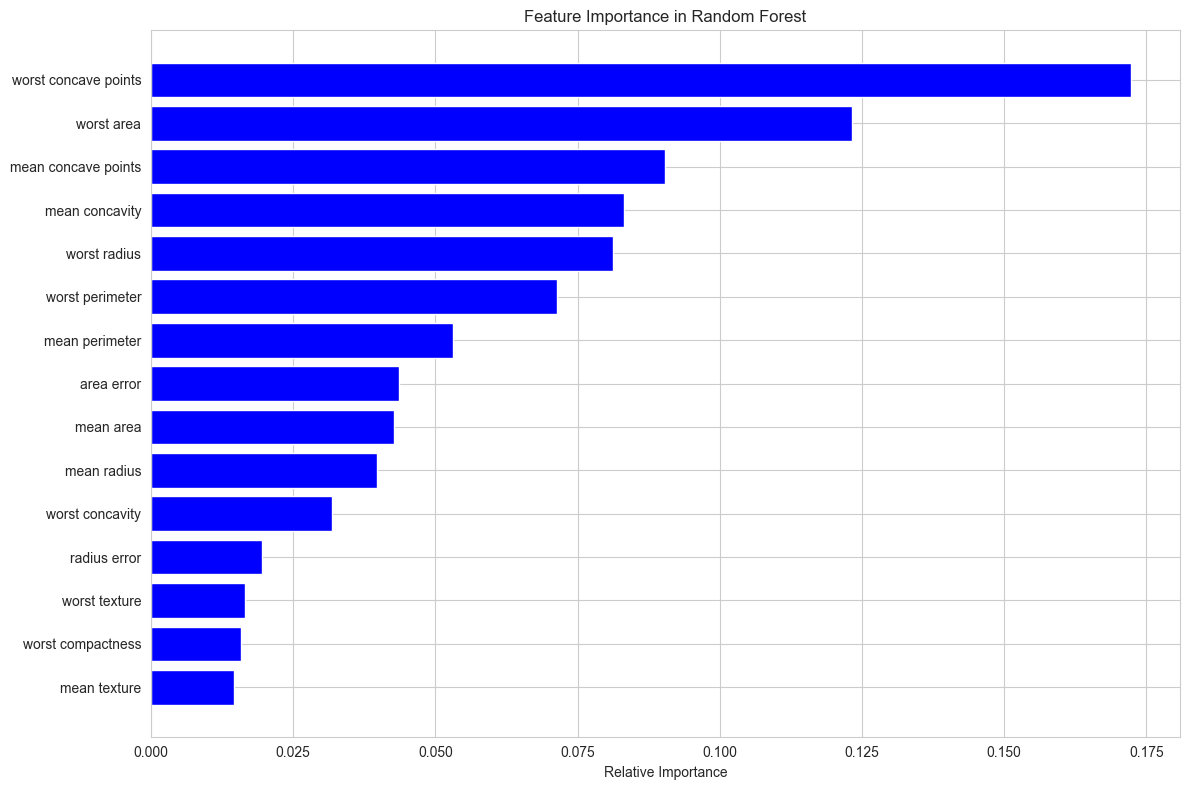

In [35]:
# Visualize feature importance
plt.figure(figsize=(12, 8))
features = cancer.feature_names
importances = rf.feature_importances_
indices = np.argsort(importances)[-15:]  # Get indices of top 15 features

plt.title('Feature Importance in Random Forest')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.tight_layout()
plt.show()

In [36]:
# Let's also try the BaggingClassifier with Decision Trees as base estimator
bagging = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=100,
    random_state=42
)
bagging.fit(X_train, y_train)
y_pred_bag = bagging.predict(X_test)

print("Bagging with Decision Trees Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_bag):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_bag))

Bagging with Decision Trees Performance:
Accuracy: 0.9580

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        54
           1       0.97      0.97      0.97        89

    accuracy                           0.96       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143



### Bagging Summary

As we can see, both Random Forest and BaggingClassifier typically outperform a single decision tree. This demonstrates how bagging can reduce variance and improve model performance.

## 2. Boosting

Boosting builds models sequentially, where each model tries to correct the errors of its predecessor.

![Boosting Process](https://cdn.analyticsvidhya.com/wp-content/uploads/2023/08/image-8.png)

### Key Features of Boosting:
- Models are built **sequentially**
- Each model gives **more weight to misclassified samples** from previous model
- Predictions are combined through **weighted averaging** or **voting**
- Primarily focused on **reducing bias**

### Popular Boosting Algorithms:
- **AdaBoost** (Adaptive Boosting)
- **Gradient Boosting**
- **XGBoost** (Extreme Gradient Boosting)

### Example: AdaBoost and Gradient Boosting

In [37]:
# Implement AdaBoost
ada = AdaBoostClassifier(n_estimators=100, random_state=42)
ada.fit(X_train, y_train)
y_pred_ada = ada.predict(X_test)

print("AdaBoost Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_ada):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_ada))

AdaBoost Performance:
Accuracy: 0.9790

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97        54
           1       0.99      0.98      0.98        89

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



In [38]:
# Implement Gradient Boosting
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)

print("Gradient Boosting Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_gb):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_gb))

Gradient Boosting Performance:
Accuracy: 0.9580

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        54
           1       0.97      0.97      0.97        89

    accuracy                           0.96       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143



In [39]:
# Let's also implement XGBoost
xgb = XGBClassifier(n_estimators=100, random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

print("XGBoost Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_xgb):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb))

XGBoost Performance:
Accuracy: 0.9650

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95        54
           1       0.97      0.98      0.97        89

    accuracy                           0.97       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.97      0.97      0.96       143



### Comparing Learning Rates in Gradient Boosting

The learning rate controls how much each tree contributes to the final prediction. Let's examine its effect:

Learning Rate: 0.01, Accuracy: 0.9580
Learning Rate: 0.1, Accuracy: 0.9580
Learning Rate: 0.5, Accuracy: 0.9580
Learning Rate: 1.0, Accuracy: 0.9441


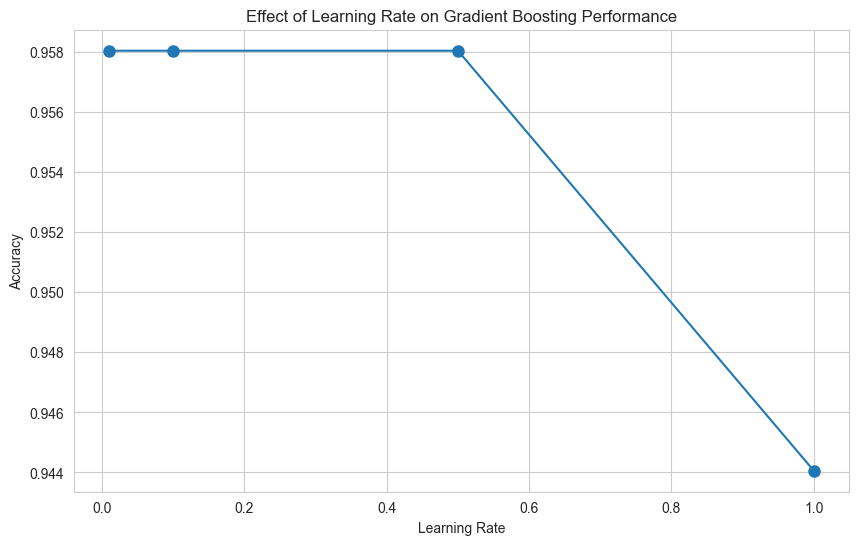

In [40]:
# Test different learning rates for Gradient Boosting
learning_rates = [0.01, 0.1, 0.5, 1.0]
accuracies = []

for lr in learning_rates:
    gb = GradientBoostingClassifier(n_estimators=100, learning_rate=lr, random_state=42)
    gb.fit(X_train, y_train)
    y_pred = gb.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print(f"Learning Rate: {lr}, Accuracy: {acc:.4f}")

# Visualize the effect of learning rate
plt.figure(figsize=(10, 6))
plt.plot(learning_rates, accuracies, 'o-', markersize=8)
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.title('Effect of Learning Rate on Gradient Boosting Performance')
plt.grid(True)
plt.show()

### Boosting Summary

Boosting algorithms like AdaBoost, Gradient Boosting, and XGBoost often achieve high accuracy by sequentially improving on the errors of previous models. However, they can be more prone to overfitting compared to bagging methods, which is why careful tuning of parameters like learning rate is important.

## 3. Stacking (Stacked Generalization)

Stacking combines multiple models using another model, called a meta-learner or blender, to make the final prediction.

![Stacking Process](https://cdn.analyticsvidhya.com/wp-content/uploads/2023/01/38738stacking-process.webp)

### Key Features of Stacking:
- Multiple **base learners** (different algorithms) are trained on the complete training set
- A **meta-learner** (or blender) is trained on the outputs of the base learners
- Allows combination of different types of models
- Can capture different patterns in the data

### Example: Stacking Classifier with Different Base Models

In [41]:
# Define base models
base_models = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('ada', AdaBoostClassifier(n_estimators=100, random_state=42)),
    ('svc', SVC(probability=True, kernel='linear', random_state=42))
]

# Define meta-learner
meta_learner = LogisticRegression()

# Create stacking classifier
stacking = StackingClassifier(
    estimators=base_models,
    final_estimator=meta_learner,
    cv=5,  # 5-fold cross-validation for training meta-learner
    stack_method='predict_proba'
)

# Train the stacking model
stacking.fit(X_train, y_train)
y_pred_stack = stacking.predict(X_test)

print("Stacking Classifier Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_stack):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_stack))

Stacking Classifier Performance:
Accuracy: 0.9650

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95        54
           1       0.97      0.98      0.97        89

    accuracy                           0.97       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.97      0.97      0.96       143



### Custom Stacking Implementation

Let's implement a custom stacking approach for better understanding:

### Comparing All Models

Let's compare the performance of all ensemble methods we've implemented:

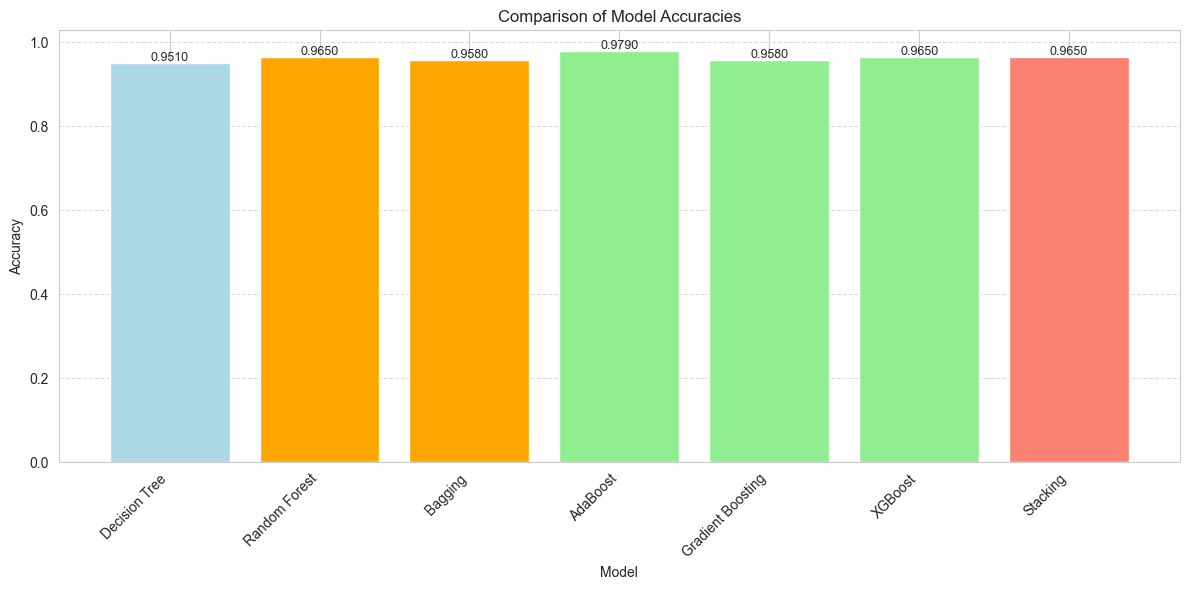

In [42]:
# Collect all results
models = [
    ('Decision Tree', y_pred_tree),
    ('Random Forest', y_pred_rf),
    ('Bagging', y_pred_bag),
    ('AdaBoost', y_pred_ada),
    ('Gradient Boosting', y_pred_gb),
    ('XGBoost', y_pred_xgb),
    ('Stacking', y_pred_stack),
]

# Calculate accuracy for each model
results = [(name, accuracy_score(y_test, pred)) for name, pred in models]

# Plot results
names = [r[0] for r in results]
scores = [r[1] for r in results]

plt.figure(figsize=(12, 6))
bars = plt.bar(names, scores, color=['lightblue' if 'Tree' in n else 'lightgreen' if 'Boost' in n 
                                     else 'salmon' if 'Stack' in n else 'orange' for n in names])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add accuracy values on top of bars
for bar, score in zip(bars, scores):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.005, 
             f"{score:.4f}", ha='center', fontsize=9)

plt.tight_layout()
plt.show()

## Ensemble Learning in Practice

### When to Use Each Ensemble Method:

1. **Bagging (e.g., Random Forest)**
   - When you have high-variance models (e.g., deep decision trees)
   - When the dataset is noisy
   - When you want to reduce overfitting
   - When parallel computing is available

2. **Boosting (e.g., AdaBoost, Gradient Boosting)**
   - When you have high-bias models (e.g., shallow decision trees)
   - When you want to maximize predictive accuracy
   - When you have clean data with few outliers
   - When you have computational resources for sequential training

3. **Stacking**
   - When you have diverse models that capture different patterns
   - When you want to leverage strengths of multiple algorithms
   - When you have sufficient data for training both base and meta models
   - When computational resources aren't a constraint

## Advantages and Disadvantages of Ensemble Methods

### Advantages:
- **Improved Performance**: Generally outperform single models
- **Stability**: More robust to variations in data
- **Generalization**: Better generalization to unseen data
- **Reduced Overfitting**: Especially with bagging methods

### Disadvantages:
- **Computational Cost**: More resource-intensive to train and deploy
- **Complexity**: More complex to implement and maintain
- **Interpretability**: Less interpretable than single models
- **Storage Requirements**: Need to store multiple models

## Conclusion

Ensemble learning provides powerful techniques to improve model performance by combining multiple models. We've explored three main approaches:

1. **Bagging**: Training multiple instances of the same model on different subsets and combining their predictions
2. **Boosting**: Building models sequentially to correct previous errors
3. **Stacking**: Using another model to combine the predictions of different base models

Each method has its strengths and is suited for different scenarios. In practice, ensemble methods often dominate machine learning competitions and are widely used in real-world applications.

Remember that while ensemble methods generally provide performance improvements, they come with increased computational cost and reduced interpretability. The choice between methods should be guided by your specific problem, available resources, and requirements for model interpretability.